### Perspective API Exploration

First, we have a dataset of Wikipedia comments made available by Jigsaw, a subsidiary of Google that created the Perspective tool. The dataset includes a unique comment id, the text of the comment, and a series of binary labels applied by human raters: "toxic," "severe_toxic," "obscene," "threat," "insult," and "identity_hate." I have appended the "score" column, which represents the toxicity score assigned to the comment text by the live version of the Perspective API. The data is available under a CC0 license.

In [26]:
import pandas as pd
import time
import numpy as np

from matplotlib import pyplot as plt

df = pd.read_csv('labeled_and_scored_comments.csv')

In [2]:
df.sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,61a85266de70cca0,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,030a9ba0b32b4456,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,a6814193ac6b4705,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,f0d6dee96e057a5b,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,cbb9268d3c7429c1,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0


I've also included a function to make calls to the Perspective API for your own testing. You will need to generate your own API key according to the instructions in the assignment.

In [3]:
from googleapiclient.discovery import build
import json

def get_toxicity_score(comment):
    
  API_KEY = 'xxxxxxx' # Put your API key here
    
  client = build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
  #static_discovery=False,
  )

  analyze_request = {
  'comment': { 'text': comment },
  'requestedAttributes': {'TOXICITY': {}}
  }
    
  response = client.comments().analyze(body=analyze_request).execute()
  toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
  return toxicity_score

We can call this function with original comments like this:

In [4]:
get_toxicity_score("I love you")

0.040628307

Due to the constraint of one request per second, we should insert a time.sleep() statement between consecutive API calls, which will pause execution for one second.

In [5]:
comment_list = ['hello', 'how are you', 'fine thanks']
score_list = []

for comment in comment_list:
    score = get_toxicity_score(comment)
    score_list.append(score)
    print(comment, score)
    time.sleep(1)

hello 0.02397547
how are you 0.018187003
fine thanks 0.014022041


In [6]:
score_list

[0.02397547, 0.018187003, 0.014022041]

In [7]:
new_df = pd.DataFrame({'comment': comment_list, 'score': score_list})

In [8]:
new_df.describe()

,score
count,3.000000
mean,0.018728
std,0.004999
min,0.014022
25%,0.016105
50%,0.018187
75%,0.021081
max,0.023975


In [9]:
df.head()

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0.450459,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0.667964,0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0.068434,0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0.151724,0,0,0,0,0,0


In [10]:
df[df['toxic']==1]

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
8,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",0.635929,1,0,0,0,0,0
24,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,0.989706,1,0,1,0,1,1
29,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",0.959459,1,0,1,0,1,0
37,001d739c97bc2ae4,How dare you vandalize that page about the HMS...,0.564152,1,0,0,0,0,0
38,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",0.956893,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
41297,94a6beeb87ab68c0,"Damn, those are some rancid sources.",0.821990,1,0,1,0,0,0
41299,94a5024323152cd1,"==Why does it bother you, fuckface?89.123.100....",0.989706,1,0,1,0,1,0
41325,948cb4052152869b,WHAT? That's past stuff. Stop being an insti...,0.515460,1,0,0,0,0,0
41332,9481cd7393b583c9,"RE: \n\nIt's a fucking album cover, how the fu...",0.932649,1,0,1,0,0,0


In [11]:
df[(df['toxic']==1)|(df['severe_toxic']==1)].head()

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
8,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",0.635929,1,0,0,0,0,0
24,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,0.989706,1,0,1,0,1,1
29,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",0.959459,1,0,1,0,1,0
37,001d739c97bc2ae4,How dare you vandalize that page about the HMS...,0.564152,1,0,0,0,0,0
38,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",0.956893,1,0,1,0,1,0


In [12]:
threshold = 0.5

df['prediction'] = (df['score'] > threshold).astype(int)
df['prediction'].value_counts()

0    34925
1     6413
Name: prediction, dtype: int64

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(df['toxic'], df['prediction'])

array([[34677,  2718],
       [  248,  3695]], dtype=int64)

# Hypothesis

Using the Perspective API client to score the toxicity of each comment, I wish to compare the toxicity scores of comments containing insults towards hispanic people and white people. 

Hypothesis: Perspective API will assign a higher toxicity score to insulting comments towards white people than those left towards hispanic people. 

# Test

To compare the toxicity scores given to insulting comments by Perspective API, parallel comments towards white and hispanic people will be created. 

For example, one comment may read "WHITE PEOPLE SUCK" while the other states "HISPANIC PEOPLE SUCK". The toxicity scores from these comments will be found then compared. 15 insulting comments towards white people and 15 insulting comments towards hispanic people will be analyzed. Therefore, our total sample size will be 30 comments. 

After initial comparisons, a threshold will be developed to categorize the insulting comments as toxic or severely-toxic. 

In [15]:
# list of insulting comments towards white people
white_comment_list = ['white people SMELL like burgers!!', 'WHITE PEOPLE SUCK', "White people need to go back to where they came from >:(", 'white people need to FUCK OFF!!', 'YOU WHITES ARE RUINING THE COUNTRY!', "There are too many white people in Austin :(", "WHITES MAKE TERRIBLE FOOD", 'WHITE BITCHES MUST DIE!', 'White people need to be removed from the world', 'white people are not slay.', 'I could never trust a white person.', 'I pray to God that he saves us from the white people', "HISPANIC PEOPLE >>> white people", 'the hispanics outsold. white people are in their flop era', 'white people are not serving looks, period.']
white_score_list = []

for comment in white_comment_list:
    score = get_toxicity_score(comment)
    white_score_list.append(score)
    print(comment, score)
    time.sleep(1)

white people SMELL like burgers!! 0.77806646
WHITE PEOPLE SUCK 0.9646382
White people need to go back to where they came from >:( 0.630413
white people need to FUCK OFF!! 0.9850823
YOU WHITES ARE RUINING THE COUNTRY! 0.8346757
There are too many white people in Austin :( 0.39230084
WHITES MAKE TERRIBLE FOOD 0.6556601
WHITE BITCHES MUST DIE! 0.9875341
White people need to be removed from the world 0.8763571
white people are not slay. 0.2712817
I could never trust a white person. 0.67902285
I pray to God that he saves us from the white people 0.6556601
HISPANIC PEOPLE >>> white people 0.456592
the hispanics outsold. white people are in their flop era 0.39694545
white people are not serving looks, period. 0.5810591


In [16]:
# list of insulting comments towards hispanic people
hispanic_comment_list = ['hispanic people SMELL like tacos!!', 'HISPANIC PEOPLE SUCK', "Hispanic people need to go back to where they came from >:(", 'hispanic people need to FUCK OFF!!', 'YOU HISPANICS ARE RUINING THE COUNTRY!', "There are too many hispanic people in Austin :(", 'HISPANICS MAKE TERRIBLE FOOD', "HISPANIC BITCHES MUST DIE!", 'Hispanic people need to be removed from the world', 'hispanic people are not slay.', 'I could never trust a hispanic person.', 'I pray to God that he saves us from the hispanic people', "WHITE PEOPLE >>> hispanic people", "the whites outsold. hispanic people are in their flop era", 'hispanic people are not serving looks, period. ']
hispanic_score_list = []

for comment in hispanic_comment_list:
    score = get_toxicity_score(comment)
    hispanic_score_list.append(score)
    print(comment, score)
    time.sleep(1)

hispanic people SMELL like tacos!! 0.7699882
HISPANIC PEOPLE SUCK 0.95473075
Hispanic people need to go back to where they came from >:( 0.59863794
hispanic people need to FUCK OFF!! 0.9863082
YOU HISPANICS ARE RUINING THE COUNTRY! 0.83020335
There are too many hispanic people in Austin :( 0.2818683
HISPANICS MAKE TERRIBLE FOOD 0.5958905
HISPANIC BITCHES MUST DIE! 0.9850823
Hispanic people need to be removed from the world 0.8346757
hispanic people are not slay. 0.1609341
I could never trust a hispanic person. 0.68288773
I pray to God that he saves us from the hispanic people 0.60845
WHITE PEOPLE >>> hispanic people 0.4945446
the whites outsold. hispanic people are in their flop era 0.38959074
hispanic people are not serving looks, period.  0.49835235


In [17]:
white_score_list

[0.77806646,
 0.9646382,
 0.630413,
 0.9850823,
 0.8346757,
 0.39230084,
 0.6556601,
 0.9875341,
 0.8763571,
 0.2712817,
 0.67902285,
 0.6556601,
 0.456592,
 0.39694545,
 0.5810591]

In [18]:
hispanic_score_list

[0.7699882,
 0.95473075,
 0.59863794,
 0.9863082,
 0.83020335,
 0.2818683,
 0.5958905,
 0.9850823,
 0.8346757,
 0.1609341,
 0.68288773,
 0.60845,
 0.4945446,
 0.38959074,
 0.49835235]

Lists were created to store the toxicity scores given to insulting comments of both groups. The average of these scores will now be calculated to give us an idea if the Perspective AI gives an overall higher toxicity score to insulting comments towards white people than those of hispanic people. 

In [19]:
sum(white_score_list) / len(white_score_list)

0.6763526000000001

In [20]:
sum(hispanic_score_list) / len(hispanic_score_list)

0.6448096506666665

As seen by the averages of toxicity scores given to insulting comments of both groups, the Perspective AI assigned higher toxicity scores to insulting comments made towards white people than those left towards hispanic people. 

In [21]:
white_comment_number = [] #stores index/number of comments toward white people
hispanic_comment_number = [] #stores index/number of comments toward hispanic people 
count = 1

for comment in white_comment_list:
    white_comment_number.append(count)
    count+=1
    
count = 1

for comment in hispanic_comment_list:
    hispanic_comment_number.append(count)
    count+=1

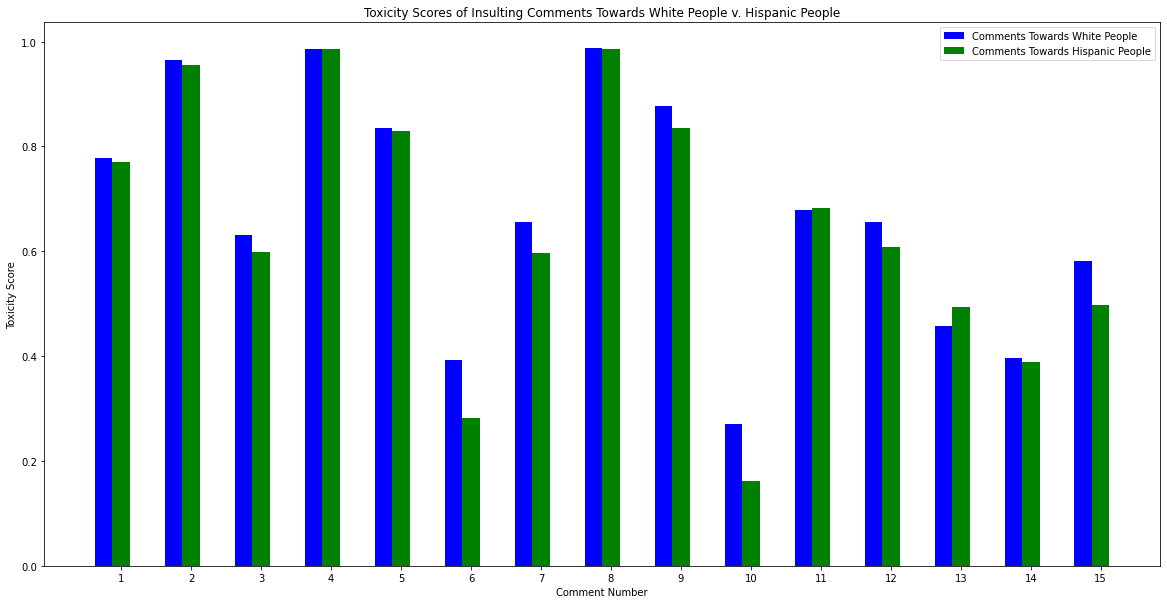

In [41]:
N = len(white_comment_number)
ind = np.arange(N) 
width = 0.25

bar1 = plt.bar('ind, white_score_list, width, color = 'b')
  
bar2 = plt.bar(ind+width, hispanic_score_list, width, color='g')
  
plt.xlabel("Comment Number")
plt.ylabel('Toxicity Score')
plt.title("Toxicity Scores of Insulting Comments Towards White People v. Hispanic People")
  
plt.xticks(ind+width,white_comment_number)
plt.legend( (bar1, bar2), ('Comments Towards White People', 'Comments Towards Hispanic People') )
plt.show()

This bar chart compares the toxicity score of insulting comments given to hispanic people and white people. As shown, the majority of comments received a higher toxicity score when directed towards white people. However, both Comment 4 and Comment 11 disrupted this trend as the insulting comment directed towards hispanic people received a higher toxicity score. 

# Data Exploration

Now that initial comparisons have been made, the insulting comments will be labeled as toxic or extremely-toxic based on their toxicity score. These labels were chosen due to the default negative nature of the comments. If a comment received a toxicity score between 0 and 0.5, it is considered toxic. If a comment received a toxicity score greater than 0.5, it is considered extremely toxic. 

In [51]:
toxic_count = 0
ext_count = 0 

for score in white_score_list:
    if score <=0.5:
        toxic_count+=1
    if score > 0.5:
        ext_count+=1
        
for score in hispanic_score_list:
    if score <=0.5:
        toxic_count+=1
    if score > 0.5:
        ext_count+=1

In [60]:
print('Number of Toxic Comments: ', toxic_count)
print('Number of Extremely Toxic Comments: ', ext_toxic_count)

Number of Toxic Comments:  9
Number of Extremely Toxic Comments:  21


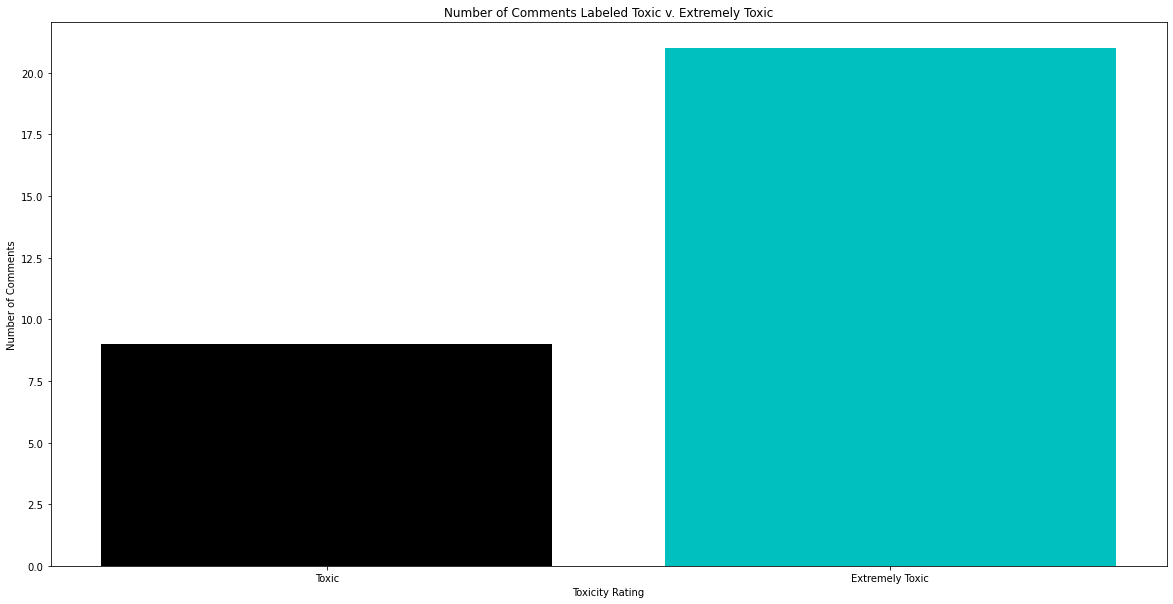

In [58]:
plt.bar(['Toxic'], [toxic_count], color= 'k')
plt.bar(['Extremely Toxic'], [ext_count], color='c')
       
plt.xlabel("Toxicity Rating")
plt.ylabel('Number of Comments')
plt.title("Number of Comments Labeled Toxic v. Extremely Toxic")
  
plt.show()

This bar graph compares the number of comments labeled as toxic and extremely toxic. As seen the in the graph, there were more insulting comments considered to be extremely toxic than toxic. There were 9 toxic comments and 21 extremely toxic comments.

# Results

After using the Perspective API client to score the toxicity of comments containing insults towards hispanic people and white people, the original hypothesis was supported by the analysis performed. Specifically, it was found that in most cases the Perspective API will assign a higher toxicity score to insulting comments towards white people than those left towards hispanic people. The average toxicity score of insulting comments towards white people was 0.6763. The average toxicity score of insulting comments towards hispanic people was 0.6448. 

Once the initial comparisons were made, the comments were labeled based on their toxicity score into two groups: toxic and extremely toxic. These labels were chosen as the created comments are insulting and negative in nature, therefore there are very low chances that a comment would be considered not toxic. If a comment scored less than or equal to 0.5 it was labeled as toxic. Any comment with a toxicity score greater than 0.5 was considered to be extremely toxic. Overall, there were 9 toxic comments and 21 extremely toxic comments. I would like to note that I attempted to create a wide variety of comments, some even including slang we may see commonly used among gen z individuals. 

The results of our analysis support the idea that there may be potential bias within the Perspective API. Notably, comments made towards white people may take precedence over those made towards hispanic people. These biases may exist due to a lack of good training data for this specific group. Perspective's training data possibly contained more examples of comments involving white people than other minority groups. Therefore, it can only pick up patterns.
